In [18]:
#First we will import appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #The configuration of the plots

In [66]:
#Now we will read in our data set
df = pd.read_csv(r'C:\Users\nickb\OneDrive\Desktop\Python\DataSets\archive\movies.csv')

In [22]:
#Our first step is to explore for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [23]:
#Now, we will do some basic data cleaning. First lets check out our data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [69]:
#Converting the budget column to int64 rather then float64
df['budget'].fillna(0,inplace=True)
df['budget'] = df['budget'].astype('int64')

In [70]:
#creating a new column in order to match the year in the year column to the year in the release date column. Not all of the years are the same
#creating the correct year released column
df['correctyear'] = df['released'].astype(str).str.extract(',(.{5})')

In [82]:
#We will now order the dat1a by the gross revenue
df.sort_values(by=['gross'],inplace=False,ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2.048360e+09,Marvel Studios,149.0,2018


In [83]:
#Our final step of cleaning our data is to look for any duplicates in the data and drop them
df['company'].drop_duplicates().sort_values(ascending=False).head()

7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
Name: company, dtype: object

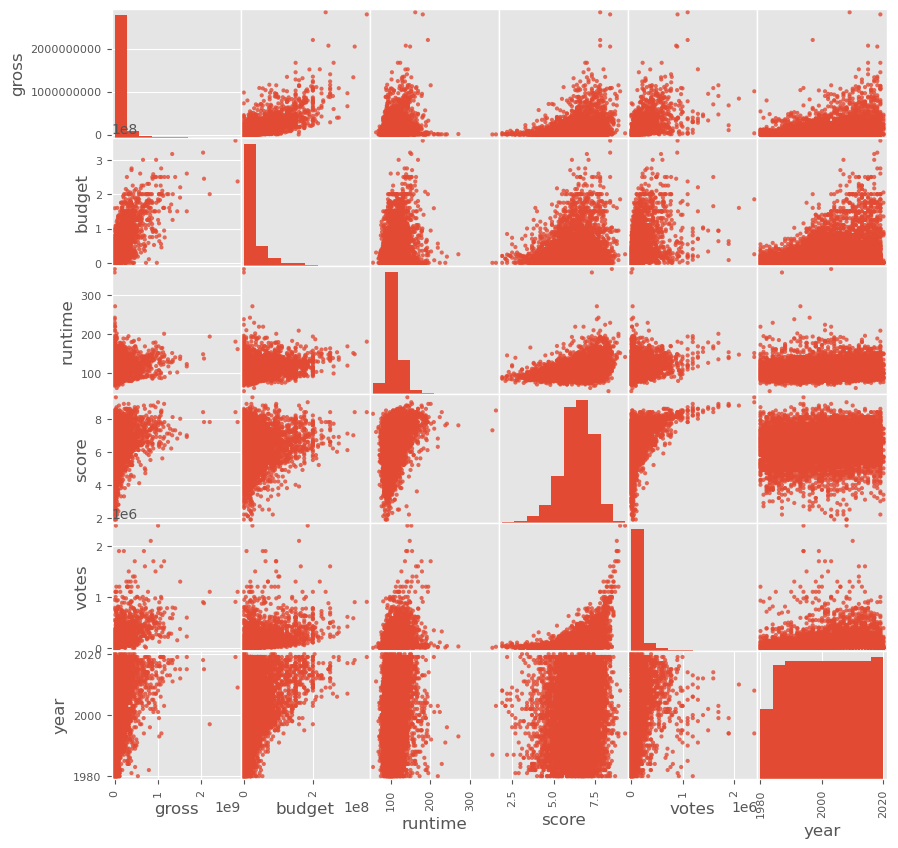

In [47]:
#Now we have the data cleaned up, we will look at gross revenue as our response variable and all others as our predictor variables
#We will find out which predictors are correlated most with our response
#Lets first create some scatter plots to observe any initial trends 
gross_comparison_df = df[['gross'] + list(df.columns.difference(['gross']))]
pd.plotting.scatter_matrix(gross_comparison_df, alpha=0.8, figsize=(10, 10), diagonal='hist');

Text(0, 0.5, 'Budget')

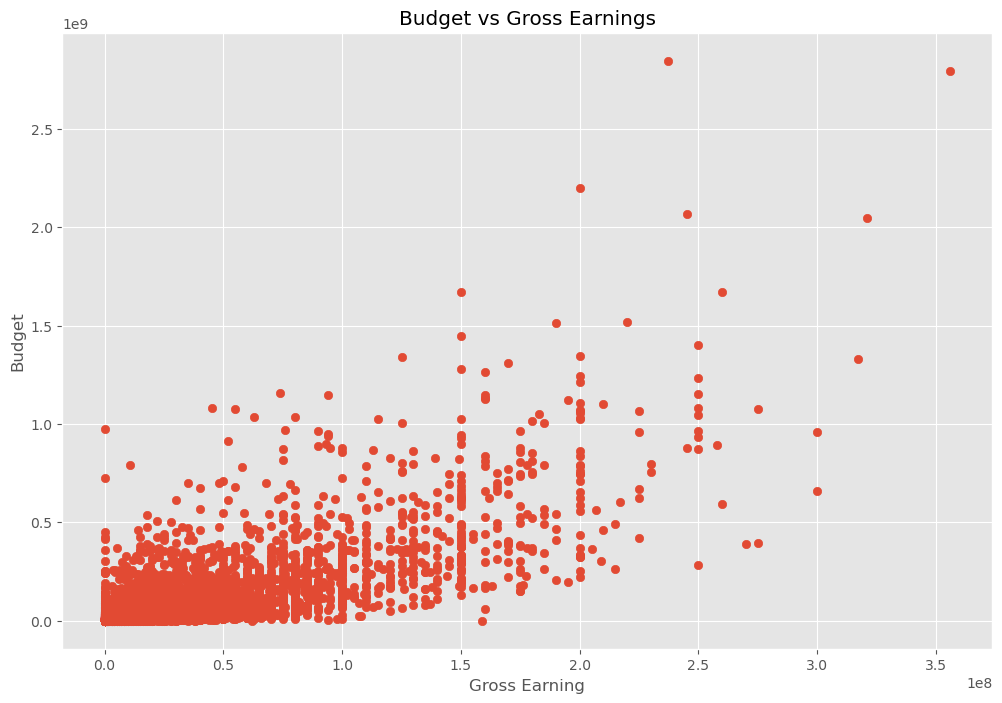

In [49]:
#We can see a multitude of scatter plots and get valuable information from them
#We will also compare our response to individual predictors that we might think be highly correlated
#First, lets look at budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earning')
plt.ylabel('Budget')


<Axes: xlabel='budget', ylabel='gross'>

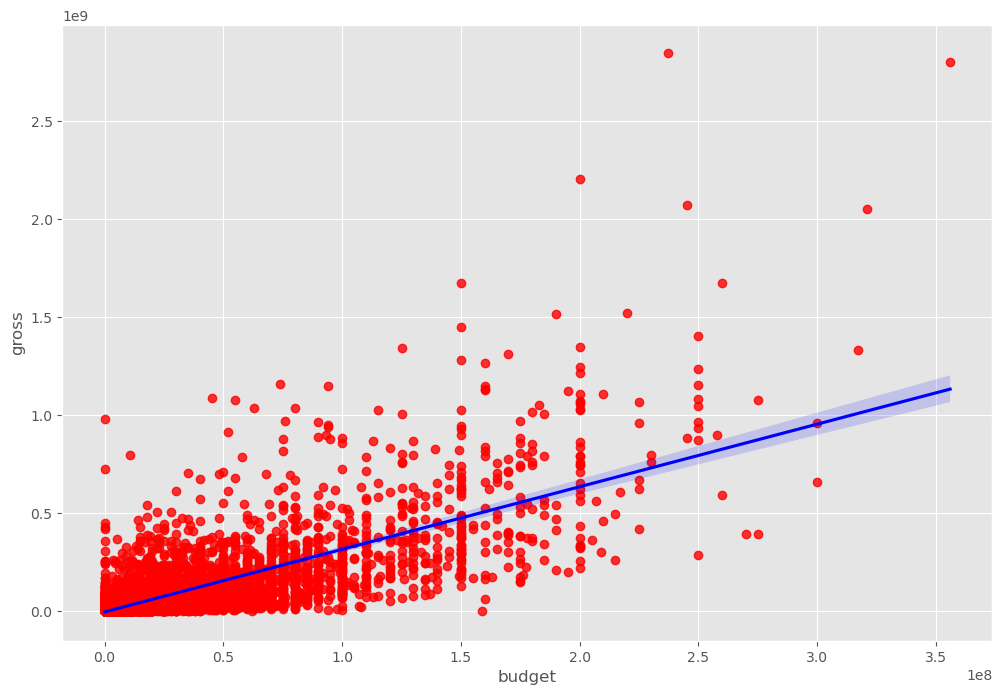

In [51]:
#Looking at the gross earnings vs budget and some of our other scatter plots, we can tell there might be some correlation
#Next, we will look at regression plots for further analysis using the seaborn library

sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [57]:
#Now we will determine what the actual correlation is
#The pearson correlation is the default. Also can use Kendall or spearman
df.corr(method='pearson')

C:\Users\nickb\AppData\Local\Temp\ipykernel_19440\3560230522.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.630757,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.748719,0.269510
gross,0.257486,0.186258,0.630757,0.748719,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.269510,0.245216,1.000000


In [53]:
#We can see the isloated correlation of budget and gross is equivalent to 0.748719,which is the highest one.

C:\Users\nickb\AppData\Local\Temp\ipykernel_19440\1301132991.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


Text(120.72222222222221, 0.5, 'Movie Features')

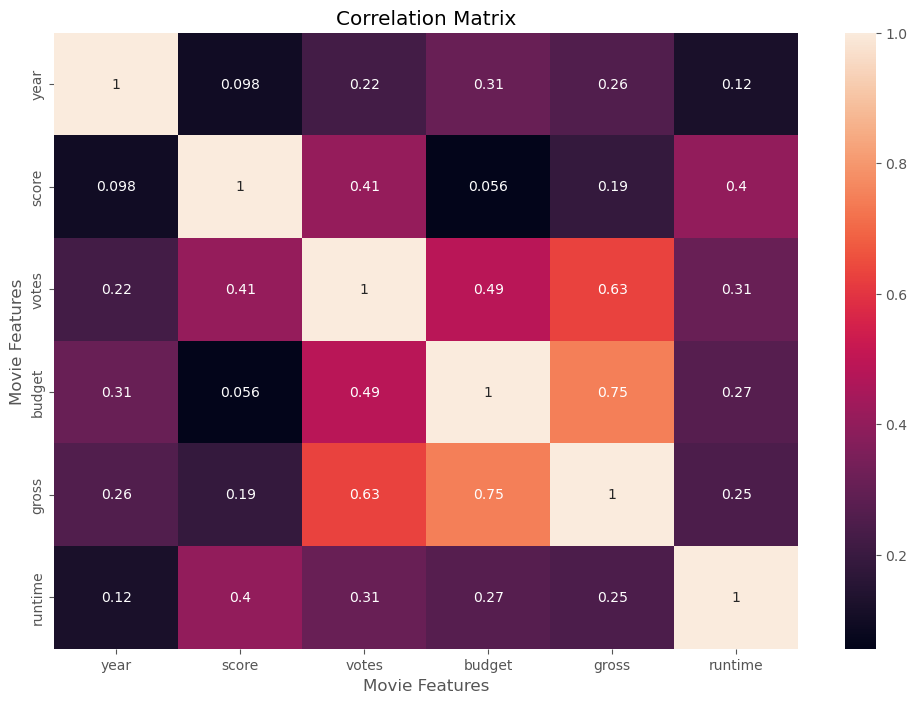

In [61]:
#Now, lets visualize the correlations we saw above when running our pearson correlation

correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [62]:
#Next we will look at the predictor company (which is quantitative rather than qualitative)
#We will just give companies unique identifiers to make the comparison

In [84]:
df_numerical = df
for col_name in df_numerical.columns:
    if(df_numerical[col_name].dtype == 'object'):
        df_numerical[col_name] = df_numerical[col_name].astype('category')
        df_numerical[col_name] = df_numerical[col_name].cat.codes
        
df_numerical.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772.0,2319,146.0,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106.0,731,104.0,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067.0,1540,124.0,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539.0,1812,88.0,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344.0,1777,98.0,0


Text(120.72222222222221, 0.5, 'Movie Features')

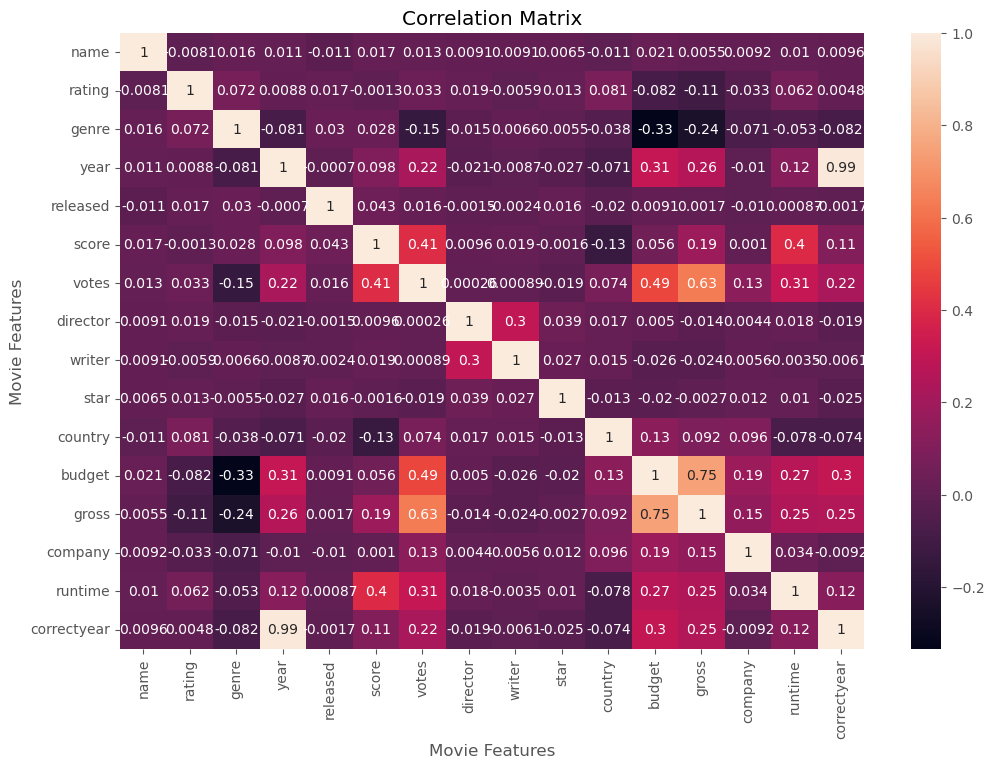

In [73]:
correlation_matrix2 = df_numerical.corr(method='pearson')
sns.heatmap(correlation_matrix2,annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [74]:
#Now, we have a signifigantly larger correlation matrix than before, with every single field

In [75]:
df_numerical.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.005533,0.009211,0.010392,0.009553
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.107339,-0.032943,0.062145,0.004829
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.235650,-0.071067,-0.052711,-0.082070
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.257486,-0.010431,0.120811,0.992136
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.001659,-0.010474,0.000868,-0.001653
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186258,0.001030,0.399451,0.105341
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.630757,0.133204,0.309212,0.219954
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014441,0.004404,0.017624,-0.018620
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.023519,0.005646,-0.003511,-0.006134
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.002717,0.012442,0.010174,-0.025288


In [85]:
#using unstacking, we will make it so we can see the highest correlations from above a little easier
correlation_mat = df_numerical.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(ascending=False)
sorted_pairs.head()

name     name       1.0
rating   rating     1.0
runtime  runtime    1.0
company  company    1.0
gross    gross      1.0
dtype: float64

In [80]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

name         name           1.000000
rating       rating         1.000000
runtime      runtime        1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
correctyear  correctyear    1.000000
year         correctyear    0.992136
correctyear  year           0.992136
gross        budget         0.748719
budget       gross          0.748719
gross        votes          0.630757
votes        gross          0.630757
dtype: float64

In [ ]:
#We can see that the only predictors with a high correlation was votes and budget